# **Entrega 1**

In [90]:
#Importar bibliotecas
from google.colab import drive
import sklearn.linear_model
drive.mount('/content/drive')
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

#Dar load dos dados
data_train=np.load('/content/X_train.npy')
data_test=np.load('/content/X_test.npy')
y_train=np.load('/content/y_train.npy')


#y_train.shape
#data_train.shape
#data_test.shape



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Outlier Removal Quartis**

In [91]:
#Remove outliers usando Metodo dos quartis
def outlier_removal(x,y):
  data=np.hstack((x,y.reshape(-1,1))) #junta matriz x e y horizontalmente e damos reshape ao y

  Q1=np.percentile(data,25,axis=0) #quartil 25
  Q3=np.percentile(data,75,axis=0) #quartil 75
  IQR= Q3-Q1 #spread dos valores do meio

  lower_bound = Q1- 1.5*IQR #1.5 é um threshold comum para definir outliers mas pode ser mudado
  upper_bound= Q3 + 1.5*IQR

  data_final=np.all((data>=lower_bound) & (data<=upper_bound), axis=1) #identifica as linhas que não são outliers

  return x[data_final],y[data_final]

xn,yn=outlier_removal(data_train,y_train)


**Outlier Removal Ransac**

In [95]:
#Remove outliers usando Ransac algoritmo
from sklearn.linear_model import RANSACRegressor, LinearRegression
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

#Escolher o modelo a usar no Ransac
model=LinearRegression()

#Criar o Modelo de Ransac usando Regressão Linear e a data de treino
ransac = RANSACRegressor(estimator=model, random_state=42)
ransac.fit(data_train, y_train)


# Ver os pontos que não são outliers
inlier_mask = ransac.inlier_mask_

#Cria dois vetores sem os outliers
x_final, y_final=data_train[inlier_mask],y_train[inlier_mask]
print(len(y_final))


152


**Outlier Removal LOF**

In [93]:
#Remove outliers usando LOF algoritmo
import numpy as np
import pandas as pd
from sklearn.neighbors import LocalOutlierFactor
import matplotlib.pyplot as plt

# Inicializa o LOF
lof = LocalOutlierFactor(n_neighbors=40, contamination=0.20)

#Cria o modelo e marca os outliers com -1
outliers = lof.fit_predict(data_train)

# Remove todos os elementos marcados anteriormente com -1
outlier_indices = np.where(outliers == -1)[0]

#Cria dois vetores sem os outliers
x_final = np.delete(data_train, outlier_indices, axis=0)
y_final = np.delete(y_train, outlier_indices, axis=0)

**Regressão Linear**

0.9957014910317193
SSE: 1.1383147709034875


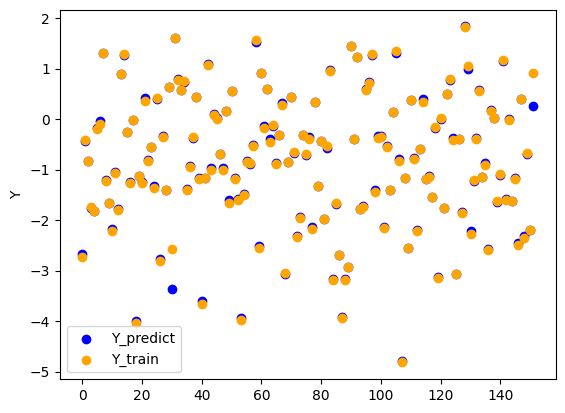

In [96]:
#Modelo de estimação LinearRegression sklearn.linear_model

reg = LinearRegression().fit(x_final, y_final) #cria o modelo de regressao linear
reg.score(x_final, y_final) #coeficienre de determinaçao r^2
print(reg.score(x_final, y_final))
reg.coef_ #coeficientes esperados betas
reg.intercept_ #termo independente

y_predict=reg.predict(x_final) #aplicar o modelo ao Data_train sem outliers(x_final) adquirindo um Y_predict

#Comparar y_predict obtido com y_train sem outliers(y_final)
sse_reg=np.sum((y_final-y_predict)**2)
print("SSE:", sse_reg)

#Plot dos vetores para ver diferenças
plt.scatter(range(0, y_predict.shape[0]), y_predict, color='blue', label='Y_predict')
plt.scatter(range(0, y_final.shape[0]), y_final, color='orange', label='Y_train')
plt.ylabel('Y')
plt.legend(['Y_predict','Y_train'])
plt.show()



**Ridge Sem CV**

0.9957014904842643
1.1383149158784422


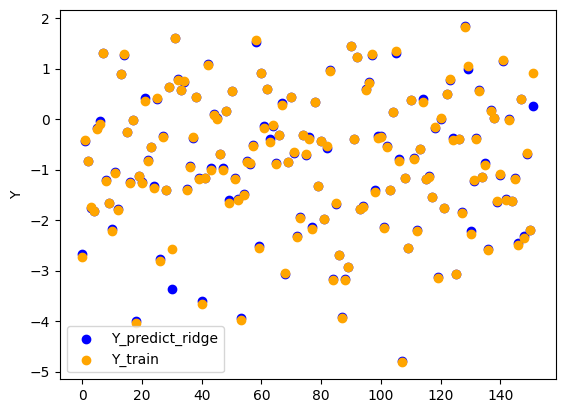

In [97]:
#Modelo de estimação Ridge sklearn.linear_model

from sklearn.linear_model import Ridge

#Cria o modelo
clf = Ridge(alpha=1)#alpha valor variavel
clf.fit(x_final, y_final)
Ridge()

print(clf.score(x_final, y_final))

y_predict_ridge=clf.predict(x_final) #aplicar o modelo ao Data_train sem outliers(x_final) adquirindo um Y_predict

#Comparar y_predict obtido com y_train sem outliers(y_final)
sse_ridge=np.sum((y_final-y_predict_ridge)**2)
print(sse_ridge)
#Plot dos vetores para ver diferenças
plt.scatter(range(0, y_predict_ridge.shape[0]), y_predict_ridge, color='blue', label='Y_predict')
plt.scatter(range(0, y_final.shape[0]), y_final, color='orange', label='Y_train')
plt.ylabel('Y')
plt.legend(['Y_predict_ridge','Y_train'])
plt.show()


**Ridge Com CV**

0.9956987138804259
1.1390502055301772


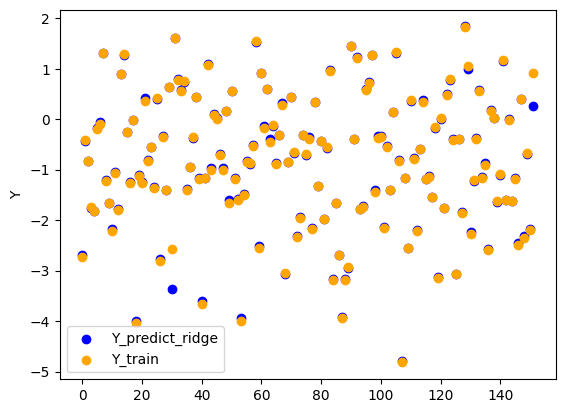

In [98]:
#Modelo de estimação RidgeCV sklearn.linear_model

from sklearn.linear_model import RidgeCV

#Cria o modelo
clf_cv = RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1,10,100],cv=5)
clf_cv.fit(x_final, y_final)
RidgeCV()

score_clf_cv=clf_cv.score(x_final, y_final)
print(score_clf_cv)

y_predict_ridgeCV=clf_cv.predict(x_final) #aplicar o modelo ao Data_train sem outliers(x_final) adquirindo um Y_predict

#Comparar y_predict obtido com y_train sem outliers(y_final)
sse_ridge=np.sum((y_final-y_predict_ridgeCV)**2)
print(sse_ridge)

#Plot dos vetores para ver diferenças
plt.scatter(range(0, y_predict_ridgeCV.shape[0]), y_predict_ridgeCV, color='blue', label='Y_predict')
plt.scatter(range(0, y_final.shape[0]), y_final, color='orange', label='Y_train')
plt.ylabel('Y')
plt.legend(['Y_predict_ridge','Y_train'])
plt.show()

**Lasso Sem CV**

0.9956468201316051
1.152792510416854


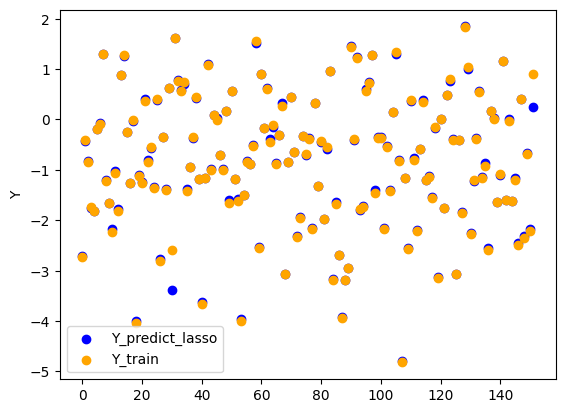

In [99]:
#Modelo de estimação Ridge sklearn.linear_model

from sklearn.linear_model import Lasso

#Cria o modelo
lasso_reg = Lasso(alpha=0.1)  #Valor de alpha ajustável
lasso_reg.fit(x_final, y_final)

y_predict_lasso = lasso_reg.predict(x_final) #aplicar o modelo ao Data_train sem outliers(x_final) adquirindo um Y_predict
train_score_ls=lasso_reg.score(x_final, y_final)
print(train_score_ls)

#Comparar y_predict obtido com y_train sem outliers(y_final)
sse_lasso=np.sum((y_final-y_predict_lasso)**2)
print(sse_lasso)

#Plot dos vetores para ver diferenças
plt.scatter(range(0, y_predict_lasso.shape[0]), y_predict_lasso, color='blue', label='Y_predict_lasso')
plt.scatter(range(0, y_final.shape[0]), y_final, color='orange', label='Y_train')
plt.ylabel('Y')
plt.legend(['Y_predict_lasso','Y_train'])
plt.show()


**Lasso Com CV**

0.9956433033581973
1.1537238089544555


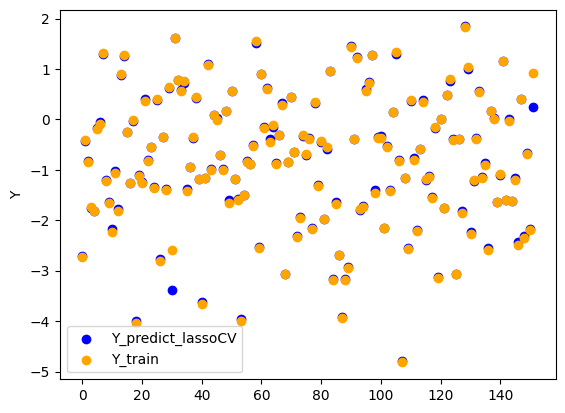

In [100]:
#Modelo de estimação LassoCV sklearn.linear_model

from sklearn.linear_model import LassoCV

#Cria o modelo
lasso_cv = LassoCV(cv=5, random_state=42, alphas=None)

# Ajustar o modelo Lasso aos dados
lasso_cv.fit(x_final, y_final)

y_predict_lassoCV = lasso_cv.predict(x_final) #aplicar o modelo ao Data_train sem outliers(x_final) adquirindo um Y_predict
train_score_lsCV=lasso_cv.score(x_final, y_final)
print(train_score_lsCV)

#Comparar y_predict obtido com y_train sem outliers(y_final)
sse_lassoCV=np.sum((y_final-y_predict_lassoCV)**2)
print(sse_lassoCV)

#Plot dos vetores para ver diferenças
plt.scatter(range(0, y_predict_lassoCV.shape[0]), y_predict_lassoCV, color='blue', label='Y_predict_lassoCV')
plt.scatter(range(0, y_final.shape[0]), y_final, color='orange', label='Y_train')
plt.ylabel('Y')
plt.legend(['Y_predict_lassoCV','Y_train'])
plt.show()

**Final: Ransac Com regressão Linear e Validação(Kfold)**

In [105]:
from sklearn.linear_model import RANSACRegressor, LinearRegression
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import cross_val_score, KFold

#Escolher o Modelo a utilizar no Ransac
Modelo =LinearRegression()
# LassoCV(cv=5, random_state=42, alphas=None)
# RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1,10,100],cv=5)


# Criar o Modelo de Ransac usando Regressão Linear e a data de treino, Random_state garante Reprodutibilidade
ransac = RANSACRegressor(estimator=Modelo, random_state=42)
ransac.fit(data_train, y_train)

# Ver os pontos que não são outliers
inlier_mask = ransac.inlier_mask_
x_final, y_final=data_train[inlier_mask],y_train[inlier_mask]
print(len(y_final))

y_predict=ransac.predict(data_test) #aplicar o modelo ao data_test
np.save('y_predicted.npy', y_predict) #Guardar vetor a entregar

#sse_ransac=np.sum((y_final-y_predict)**2)
#print(sse_ransac)

#Aplicar K-Fold cross-validation para avaliar a performance do modelo obtido
kf = KFold(n_splits=5, shuffle=True, random_state=42)

#Obter os valores de r^2 de forma a ver os resultados da cross-validation
r2_scores = cross_val_score(ransac, x_final, y_final, scoring='r2', cv=kf)
print(f"Cross-validated R² scores (5 folds): {r2_scores}")
print(f"Mean cross-validated R² score: {np.mean(r2_scores)}")

'''
plt.scatter(range(0, y_predict.shape[0]), y_predict, color='blue', label='Y_predict')
plt.scatter(range(0, y_final.shape[0]), y_final, color='orange', label='Y_train')
plt.ylabel('Y')
plt.legend(['Y_predict','Y_train'])
plt.show()
'''



152
Cross-validated R² scores (5 folds): [0.98767585 0.99924483 0.9995583  0.99957388 0.99140459]
Mean cross-validated R² score: 0.9954914918517106


"\nplt.scatter(range(0, y_predict.shape[0]), y_predict, color='blue', label='Y_predict')\nplt.scatter(range(0, y_final.shape[0]), y_final, color='orange', label='Y_train')\nplt.ylabel('Y')\nplt.legend(['Y_predict','Y_train'])\nplt.show()\n"

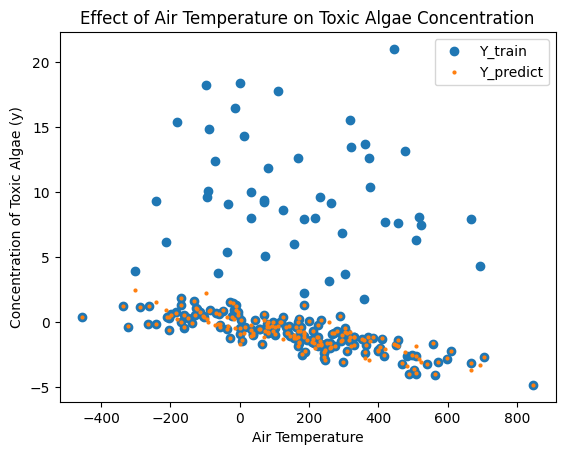

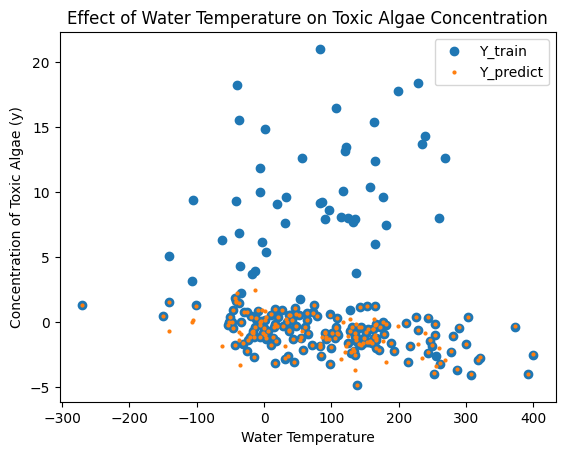

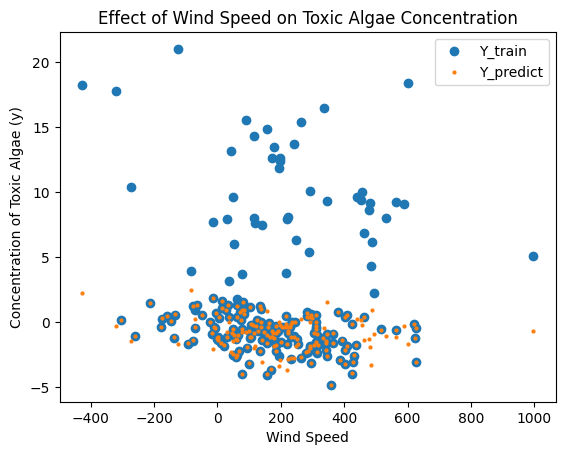

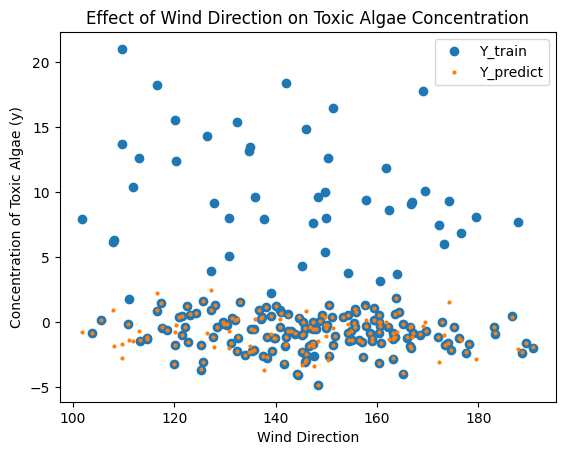

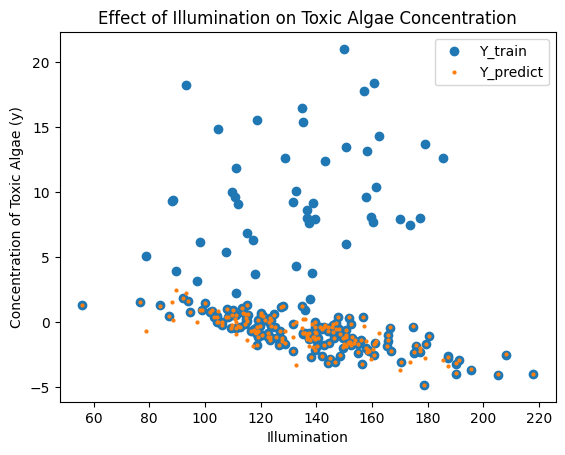

'\nTrabalho realizado por:\nCarolina Tilley, ist199899\nJoão Lopes, ist199973\n'

In [104]:
#Plots finas para comparação de Y_predict com o Y_train
feature_names = ['Air Temperature', 'Water Temperature', 'Wind Speed', 'Wind Direction', 'Illumination']

# Loop through each feature in data_train
for i in range(data_train.shape[1]):
    plt.figure(i)  # Create a new figure for each feature
    plt.plot(data_train[:, i], y_train, 'o', label='Y_train')  # Plot training data
    plt.plot(data_test[:, i], y_predict, 'o', markersize=2, label='Y_predict')  # Plot predicted data
    plt.xlabel(feature_names[i])  # Label x-axis with the feature name
    plt.ylabel('Concentration of Toxic Algae (y)')  # Label y-axis
    plt.legend()  # Add legend to the plot
    plt.title(f'Effect of {feature_names[i]} on Toxic Algae Concentration')  # Add title
    plt.show()  # Display the plot

'''
Trabalho realizado por:
Carolina Tilley, ist199899
João Lopes, ist199973
'''